In [67]:
#A variable's single variable graph across each time subperiod
#compared to its heatmap with a whole panel dataset against the variable of time

#Dataset: panel data

#Value to see if the result is consistent

#how does the Sum of the predictor coefficients relate as a statistic to the observed probablity in the trained population
#if you split up into subpopulations of higher risk does it associate monotonically

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from interpret import show
from interpret.data import ClassHistogram
from interpret.glassbox import ExplainableBoostingClassifier, LogisticRegression, ClassificationTree, DecisionListClassifier
from interpret.perf import ROC
from interpret.glassbox import LogisticRegression, ClassificationTree
#without the class structure single shot each time
from interpret import show
from interpret.data import ClassHistogram
from interpret.glassbox import ExplainableBoostingClassifier, LogisticRegression, ClassificationTree, DecisionListClassifier
from interpret.perf import ROC
from interpret.glassbox import LogisticRegression, ClassificationTree
import collections
import matplotlib.pylab as plt

In [69]:
#Upload Data and Data Cleanup

df = pd.read_csv("/Users/gabrielalon/Desktop/heartdisease.csv")
df.columns = [
    "male","age","education","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","prevalentHyp","diabetes","totChol","sysBP","diaBP","BMI","heartRate","glucose","TenYearCHD"
]
print("Nan missing values by column")
#Number of Nans by column
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
print(type(df))
df.fillna(df.mean(), inplace=True)
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
df.head()
missing_val_count_by_column = (df.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])
#dropping NaN rows

print(missing_val_count_by_column[missing_val_count_by_column > 0])
df.dropna(axis=0,inplace=True)

missing_val_count_by_column = (df.isnull().sum())
print("No Missing values remaining")

Nan missing values by column
education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Series([], dtype: int64)
Series([], dtype: int64)
Series([], dtype: int64)
No Missing values remaining


In [70]:
#df = pd.read_csv("/Users/gabrielalon/Desktop/heart.csv")
#df.columns = ["Age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
#df.fillna(df.mean(), inplace=True)
#missing_val_count_by_column = (df.isnull().sum())
#print(missing_val_count_by_column[missing_val_count_by_column > 0])
#df.head()
#Total = sum(df.TenYearCHD)
#print (Total)

# Data Manipulation

In [71]:
#Split my data into 10 datasets
#Here they are randomly sampled from the originalk dataset and all are 1/10th its size

print("Number of samples")
print(len(df))
df1 = df.sample(frac=0.1)
df2 = df.sample(frac=0.1)
df3 = df.sample(frac=0.1)
df4 = df.sample(frac=0.1)
df5 = df.sample(frac=0.1)
df6 = df.sample(frac=0.1)
df7 = df.sample(frac=0.1)
df8 = df.sample(frac=0.1)
df9 = df.sample(frac=0.1)
df10 = df.sample(frac=0.1)
print("Number of samples in each dataset now")
print(len(df1))


Number of samples
4240
Number of samples in each dataset now
424


# Data Manipulation

In [72]:
#creating a time period label so that each dataset now belongs to a different period of time
#EX: df1 is year 1, df2 is year 2, df3 is year 3 etc. he

#**check if this has ordinal properties ie: 10 not treated more special than lower value time periods
#could reverse order the time label with the same data and see if the pattern reverses or is magnitude of time label dependent
#rather than sequence dependent**

df1_copy = df1
num1 = [1]*len(df1_copy)
df2_copy = df2
num2 = [2]*len(df2_copy)
df3_copy = df3
num3 = [3]*len(df3_copy)
df4_copy = df4
num4 = [4]*len(df4_copy)
df5_copy = df5
num5 = [5]*len(df5_copy)
df6_copy = df6
num6 = [6]*len(df6_copy)
df7_copy = df7
num7 = [7]*len(df7_copy)
df8_copy = df8
num8 = [8]*len(df8_copy)
df9_copy = df9
num9 = [9]*len(df9_copy)
df10_copy = df10
num10 = [10]*len(df10_copy)

"""
df1['year'] = (num1)
df2['year'] = (num2)
df3['year'] = (num3)
df4['year'] = (num4)
df5['year'] = (num5)
df6['year'] = (num6)
df7['year'] = (num7)
df8['year'] = (num8)
df9['year'] = (num9)
df10['year'] = (num10)
"""

df1.insert(0,'panel_year',num1)
df2.insert(0,'panel_year',num2)
df3.insert(0,'panel_year',num3)
df4.insert(0,'panel_year',num4)
df5.insert(0,'panel_year',num5)
df6.insert(0,'panel_year',num6)
df7.insert(0,'panel_year',num7)
df8.insert(0,'panel_year',num8)
df9.insert(0,'panel_year',num9)
df10.insert(0,'panel_year',num10)


In [73]:
#If you uncomment these you will see that the "year label" is present and matches the dataset name
#ie: there is a year 3 column in the dataset three
#print(df1)
#print(df10)

# Data Manipulation 

In [74]:
#this block is another component for experimentaiton
#here the systolic blood pressure data is being manipulated so that there is a trend
#in the underlying data from one time period to the next in an increasing fashion.

df1['sysBP'] = 1.05*df1['sysBP']
df2['sysBP'] = 1.1*df2['sysBP']
df3['sysBP'] = 1.15*df3['sysBP']
df4['sysBP'] = 1.2*df4['sysBP']
df5['sysBP'] = 1.25*df5['sysBP']
df6['sysBP'] = 1.3*df6['sysBP']
df7['sysBP'] = 1.35*df7['sysBP']
df8['sysBP'] = 1.4*df8['sysBP']
df9['sysBP'] = 1.45*df9['sysBP']
df10['sysBP'] = 10*df10['sysBP']



In [75]:
"""
delete?
a = df2.iloc[0,1]
b = df2.iloc[1,1]
print(a,b)
#row, column
df2.iloc[0:3,16:17]
"""

'\ndelete?\na = df2.iloc[0,1]\nb = df2.iloc[1,1]\nprint(a,b)\n#row, column\ndf2.iloc[0:3,16:17]\n'

# Data Manipulation

In [76]:
#Or manipulate the dependent variables of only one outcome state at a time for a clear signal.
#Here im manipulating all rows where the patient got the disease by increasing the number of cigarretes all of them smoked
#by 30%
for i in range(len(df1)):
    if df2.iloc[i,16] == 1:
        df2.iloc[i,5] = df2.iloc[i,5]*5


In [117]:
frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10]
panel_data = pd.concat(frames, sort=False)


In [118]:
def splitting(df):
    df = df
    train_cols = df.columns[0:-1]
    label = df.columns[-1]
    X = df[train_cols]
    y = df[label] 
    #y = df[label].apply(lambda x: 0 if x == " <=50K" else 1) #Turning response into 0 and 1
    seed = 1
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)
    return [X_train, y_train, X_test, y_test, X, y]
        

In [119]:
class ga2m:
    def __init__(self, df):
        self.df = df
        self.globals = 0
        
    def splitting(df):
            df = df
            train_cols = df.columns[0:-1]
            label = df.columns[-1]
            X = df[train_cols]
            y = df[label] 
            #y = df[label].apply(lambda x: 0 if x == " <=50K" else 1) #Turning response into 0 and 1
            seed = 1
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)
            return [X_train, y_train, X_test, y_test, X, y]
        
    splitting = splitting(df1)
    X_train = splitting[0] 
    y_train = splitting[1]
    X_test = splitting[2] 
    y_test = splitting[3]
    X = splitting[4]
    y = splitting[5]

        
    def plot(self):
        df = self.df
        from interpret import show
        from interpret.data import ClassHistogram
        from interpret.glassbox import ExplainableBoostingClassifier, LogisticRegression, ClassificationTree, DecisionListClassifier
        from interpret.perf import ROC
        from interpret.glassbox import LogisticRegression, ClassificationTree
        train_cols = df.columns[0:-1]
        label = df.columns[-1]
        X = df[train_cols]
        y = df[label] 
        #y = df[label].apply(lambda x: 0 if x == " <=50K" else 1) #Turning response into 0 and 1

        seed = 1
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

        hist = ClassHistogram().explain_data(X_train, y_train, name = 'Train Data')
        #show(hist)

        #ebm = ExplainableBoostingClassifier(random_state=seed)
       # ebm = ExplainableBoostingClassifier(interactions=[[0, 1], [2, 3]])
        ebm = ExplainableBoostingClassifier(interactions=[[1, 5]])
     #   ebm = ExplainableBoostingClassifier(interactions=1, random_state=seed)
        ebm.fit(X_train, y_train)   #Works on dataframes and numpy arrays

        ebm_global = ebm.explain_global(name='EBM')
        self.globals = ebm_global
       # return ebm_global
        graph_data = ebm_global.data(-1)
        return(graph_data)
       # show(ebm_global)
        ebm_local = ebm.explain_local(X_test[:5], y_test[:5], name='EBM')
        #show(ebm_local)
        ebm_perf = ROC(ebm.predict_proba).explain_perf(X_test, y_test, name='EBM')
      #  show(ebm_perf)

        # We have to transform categorical variables to use Logistic Regression and Decision Tree
        X_enc = pd.get_dummies(X, prefix_sep='.')
        feature_names = list(X_enc.columns)
        X_train_enc, X_test_enc, y_train, y_test = train_test_split(X_enc, y, test_size=0.20, random_state=seed)

        lr = LogisticRegression(random_state=seed, feature_names=feature_names, penalty='l1')
        lr.fit(X_train_enc, y_train)
        help(lr)

        tree = ClassificationTree()
        tree.fit(X_train_enc, y_train)

        lr_perf = ROC(lr.predict_proba).explain_perf(X_test_enc, y_test, name='Logistic Regression')
        tree_perf = ROC(tree.predict_proba).explain_perf(X_test_enc, y_test, name='Classification Tree')
        print(type(tree_perf))
      #  show(lr_perf)
       # show(tree_perf)
       # show(ebm_perf)

        lr_global = lr.explain_global(name='LR')
        tree_global = tree.explain_global(name='Tree')

       # show(lr_global)
      #  show(tree_global)
       # show(ebm_global)
     #   show([hist, lr_global, lr_perf, tree_global, tree_perf, ebm_global, ebm_perf], share_tables=True)

In [125]:
#Run on each time period
p0 = ga2m(df)
p1 = ga2m(df1)
p2 = ga2m(df2)
p3 = ga2m(df3)
p4 = ga2m(df4)
p5 = ga2m(df5)
p6 = ga2m(df6)
p7 = ga2m(df7)
p8 = ga2m(df8)
p9 = ga2m(df9)


result0 = p0.plot()
result1 = p1.plot()
result2 = p2.plot()
result3 = p3.plot()
result4 = p4.plot()
result5 = p5.plot()
result6 = p6.plot()
result7 = p7.plot()
result8 = p8.plot()
result9 = p9.plot()
#print((result1))
#resultprime = p3.plot()
results = []
#all the pairwise heatmaps
results = [result1, result2, result3, result4, result5, result6, result7, result8, result9]
#print(results)

# Set the Variable for whose 'specific' data will be accessed

In [127]:
#delete?

#'overall' is simply one value coefficient sumamary per variable 
#and doesn't vary for each variable like its actually defined

#specific = (result0['specific'])
#print(specific)

In [ ]:
#frames "input data" =/ results "output plot data" =/ specifc_series "output prediction data"

In [128]:
specific_series = (result0['specific'],result1['specific'],result2['specific'],result3['specific'],result4['specific'],result5['specific'],result6['specific'],result7['specific'],result8['specific'],result9['specific'])

In [92]:
#Validates whether its a single variable or a pairwise graph that i'm accessing
#pairwise_index contains the indices of the pairwsie graphs at the tailend

In [94]:
#[https://stackoverflow.com/questions/2868342/how-to-search-for-closest-value-in-a-lookup-table]
import bisect
#Returns the closest entry in the sorted list 'sorted' to 'value'. Returns an index rather than the value
def find_closest(sorted, value):
 #   sorted_cp = sorted
    sorted_cp = [x for x in sorted if str(x) != 'nan']
  #  for i in range(len(sorted_cp)):
   #     if sorted[i] == nan:
    #        print(sorted[i])
     #       del(sorted[i])
            
    if (value <= sorted_cp[0]):
     #    return sorted[0]
         return int(0)
    if (value >= sorted_cp[-1]):
    #    return sorted[-1]
        return int(len(sorted_cp)-1)
    insertpos = bisect.bisect(sorted_cp, value)
    if (abs(sorted_cp[insertpos-1] - value) <= abs(sorted_cp[insertpos] - value)):
     #   return sorted_cp[insertpos-1]
        return(int(insertpos))-1
    else:
     #   return sorted_cp[insertpos]
        return(int(insertpos))-1
    
#have to either forcerfully ignore nans and resort to the next closest value and or
#identify the source of the nans. Or delete the Nan?

#need to make doublesure this nan trick works and the value there isnt suppsoed to be zero

# Need to find and output sortable range for pairwise heatmap
#Need to validate they fixed the problem the software update was for i think its fine
#Need to find the mapping of the actual variable name to its index in the graphs

In [95]:
#pairwise uses x,y coordinates aka left and right in the data which the user has to specify

In [96]:
specific = (result0['specific'])
#where result# above is the dataset # trained on

def range_pairwise(specific):
    pairwise_indexer = []
    for i in range(len(specific)):
        for key, value in specific[i].items():
            if key == 'type':
                if (specific[i]['type']) == 'pairwise':
                    #print(i)
                    return True 

pairwise_index = []
pairwise_index.append(range_pairwise(specific))
"""
def pairwise_bool(specific):
 #   pairwise_indexer = []
    for i in range(len(specific)):
        for key, value in specific[i].items():
            if key == 'type':
                if (specific[i]['type']) == 'pairwise':
                    return True 
                    #print(i)
                   # pairwise_indexer.append(i)
"""
def pairwise_bool(dependent_variable):
 #   pairwise_indexer = []=
    if (specific[dependent_variable]['type']) == 'pairwise':
        return True 
                    #print(i)
                   # pairwise_indexer.append(i)

In [142]:
#need mapping from dependent variable name to index. currently only accept index

def pairwise_procedure(specific, dependent_variable, dependent_variable_value_x,dependent_variable_value_y):
    #consider whether the user specifies the dependent variable name instead of the actual index
    #perhaps range_pairwise should actual be a boolean for its pairwise
    yaxis = specific[dependent_variable]['right_names']
    xaxis = specific[dependent_variable]['left_names']
    try:
        xval  = find_closest(xaxis, dependent_variable_value_x)
    except:
        print("xval broke")
        print(xaxis)

    try:
        yval = find_closest(yaxis, dependent_variable_value_y)
    except:
        print("yval broke")
        print(yaxis)
   # print(xval)
  #  print(yval)
    return (specific[dependent_variable]['scores'][int(yval)][int(xval)])
   # test = (((specific[dependent_variable]['scores'][int(yval)][int(xval)])))
  #  print((int(test))


def single_var_procedure(specific, dependent_variable, dependent_variable_value):
    try:
        val = find_closest(specific[dependent_variable]['names'], dependent_variable_value)
        return(specific[dependent_variable]['scores'][int(val)])
  #  print(val)
    except:
        print("val broke")


def procedure(specific,dependent_variable, dependent_variable_value, *pairwise_y_val):
    if pairwise_bool(dependent_variable):
        try:
            return pairwise_procedure(specific, dependent_variable, dependent_variable_value, *pairwise_y_val)
        except:
            print("missing an input coordinate")
    else:
        if pairwise_y_val:
            print("careful either the selection if the selection is not a pairwise graph the extra coordinate does not apply")
        return single_var_procedure(specific, dependent_variable, dependent_variable_value)



# ITERATING through each dataset

In [143]:
#counting all Nans everywhere


#consider passing dataset index as explicit parameter to procedure function

In [153]:
#the goal here is grab the trend across one pairwise graph for a pair of coordinates
#specific series is an array of all the modeled datasets with outcomes
#an issue is that there is either a null from my work or in the data. And are all nulls only at the tail?\
#need to figure out whether the procedure method pulls horizontally or vertically
data_to_graph = []
def across_datasets(graph_index, x, *y):
    for i in specific_series:
       # a = str("result0")
        specific = (i)
      #  result = procedure(-1,50,51)
      #  print(result, "result")
       # data_to_graph.append(procedure(-1,50,51))
        data_to_graph.append(procedure(specific, graph_index,x,*y))
        #array([-0.17544706,  0.23725504])
    #scores': array([-0.1678648 ,  0.20165577])
    print(data_to_graph)
across_datasets(3,0.5)
#hello

[-0.06967881890168982, 0.026378450521326452, 0.022982727414800536, -0.01689476118847552, -0.06101494476727132, 0.11626246544040955, -0.026594959597524406, 0.02560579613843912, -0.003209188352101322, 0.0774135331868556]


In [154]:
show(p1.globals)

<!-- http://127.0.0.1:7066/4720884496/ -->

In [155]:
show(p2.globals)

<!-- http://127.0.0.1:7066/4721861264/ -->

In [156]:
#ALL of the Data

#for a dataset where time is a variable
#extract the heatmap with time in the pairwise horizontally, and compare it to each time periods single variable
#contribution value if each time period was run seperately
panel_data
panel_data_graph = ga2m(panel_data)
result_panel = panel_data_graph.plot()
specific_panel = (result_panel['specific'])
show(panel_data_graph.globals)

<!-- http://127.0.0.1:7066/4804563536/ -->

In [157]:
#need to reinitialize some ga2m parameters to compare the split up datasets to this?

In [158]:
from statistics import mean
from statistics import median
#print(mean(data_to_graph_split_periods))
#print(statistics.median(data_to_graph_split_periods))
data_to_graph_split_periods = data_to_graph[1:]
data_to_graph_all_period = data_to_graph[0]
print('combined data', data_to_graph_all_period)
print()
mean = (mean(data_to_graph_split_periods))
median = (median(data_to_graph_split_periods))
print('mean', mean)
print('median', median)

combined data -0.06967881890168982

mean 0.01788101319960652
median 0.022982727414800536


In [159]:
#Something weird with the plot references?

# Split Data Values versus Combined Data

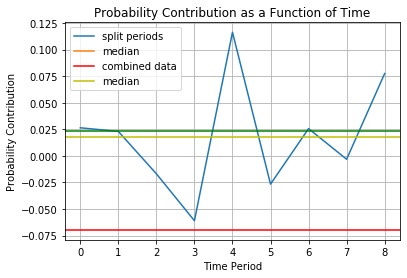

In [160]:
l1, = plt.plot(data_to_graph_split_periods) # Plot list. x-values assumed to be [0, 1, 2, 3]
plt.grid()
plt.xlabel('Time Period');
plt.ylabel('Probability Contribution');
plt.title('Probability Contribution as a Function of Time')
l2, =  plt.plot(data_to_graph_all_period)
plt.axhline(y=data_to_graph_all_period, color='r', linestyle='-')
plt.axhline(y=mean, color='y', linestyle='-')
plt.axhline(y=median, color='g', linestyle='-')
plt.legend(['split periods', 'median', 'combined data', 'median'], loc='upper left')
plt.show()

In [ ]:
#WTF!^^^^ how can the overall effect be lower than all subgroups?

In [ ]:
print(len((specific[-1]['left_names'][0:-1])))
print(len((specific[-1]['left_names'])))
print('\n')
print(len((specific[-1]['right_names'][0:-1])))
#test = (specific[-1]['scores']).tolist()
#print(min(test))
print('\n')
print(len((specific[-1]['scores'])))
print(len((specific[-1]['scores'][0])))
print(len((specific[-1]['scores'][-1])))
#are there actually 256*123 scores predefined? 31,000. That makes sense for every possible intersction of left*right
#I think the 123 scores lists are all associated with a specific point in either the set of left names or the set of right names but not
#both

#i think it always takes from the y axis ('right names') and shows you horizontally each value

In [ ]:
print('\n', "yo")
print(specific[1]['names'])
print('\n', "yo")
print(specific[1]['scores'])
print('\n')
print(specific[1]['scores_range'][-1])

print(len(specific[1]['names']))
print(len(specific[1]['scores']))

In [ ]:
#all of the heatmap value at the intersection of the 
#first coordinate (left,right) of each dataframe
#Left and Right names correspond to coordinates, while scores
#corresponds to the coefficient values computed by the model
#for those coordinate input values from the sample
#left is x axis
print(specific[-1]['left_names'])
print('\n')
print(specific[-1]['right_names'])
print('\n')
print('scores 0', specific[-1]['scores'][0])
print('\n')
print('scores 1', specific[-1]['scores'][1])
print('\n')
print('scores 3', specific[-1]['scores'][2])
print('\n')
print(specific[-1]['scores_range'][0])
print('\n')
print(specific[-1]['scores_range'][1])



#verift which pair of variables this heatmap is associated with

In [ ]:
#example of a heatmap score for a given pair of coordinates
[33.0, Left
 [16.59, right
   Its 0.041
  #and check if its a 1:1 mapping of possible coordinate intersections and the # of values in the values table

In [ ]:
#lookup table in between explicit ranges conforming
#to the original researcher's stated rule
#nearest defined value heuristic
#"for example lets say my training data has people aged 
#0-100 if you ask for a prediciton on someone who is 
#120 years old, we will simply use the same value as 
#we learned for the age 100 person"

In [ ]:
#if time is horiz axis on heatmap then vertical axis is mined for data, V.Versa 

In [ ]:
"""
print("structure for the single variable")
for key, value in specific[1].items() :
    print(key)
    print(key, type(specific[1][str(key)]))
print('\n')
print("structure for the pairwise variable")
for key, value in specific[-1].items() :
    print(key)
    print(key, type(specific[-1][str(key)]))
#
"""

In [ ]:
#defining the contents
"""
structure for the single variable
type
type <class 'str'>
names
names <class 'list'>
scores
scores <class 'numpy.ndarray'>
scores_range
scores_range <class 'tuple'>
upper_bounds
upper_bounds <class 'numpy.ndarray'>
lower_bounds
lower_bounds <class 'numpy.ndarray'>
density
density <class 'dict'>


structure for the pairwise variable
type
type <class 'str'>
left_names
left_names <class 'list'>
right_names
right_names <class 'list'>
scores
scores <class 'numpy.ndarray'>
scores_range
scores_range <class 'tuple'>
"""

In [103]:
#delete this?
"""
specific = specific_panel
print(specific[4])
print(specific[4]['type'])
print('\n')
print(pairwise_bool(4))
#procedure(4,50)
"""

"\nspecific = specific_panel\nprint(specific[4])\nprint(specific[4]['type'])\nprint('\n')\nprint(pairwise_bool(4))\n#procedure(4,50)\n"

In [93]:
a = float('NaN')
b = 5
c = np.nan
try:
    if a>b:
        print("yes")
except:
    print("no")
try:
    if b>c:
        (print("go"))
except:
    print("snow")

#the user can input a request to the right of the left of the Nan. The problem is that
#this interferes with the binary search algorithm because its close to terminating when you are already comparing
#it to the Nan itself. probably best to make a copy of the whole dataframe with the nan deleted then rerun#